In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
unum_result = 'unum/final_result.json'
sf_result = 'step-functions/final_result.json'

with open(unum_result) as f:
    unum_data = json.loads(f.read())
    
with open(sf_result) as f:
    sf_data = json.loads(f.read())

In [4]:
fan_out_sizes = list(unum_data.keys())

In [5]:
# remove the top 2 and bottom 2 e2e latency from unum_data and sf_data
def remove_top_bottom_two(l):
    l.remove(max(l))
    l.remove(max(l))
    l.remove(min(l))
    l.remove(min(l))

    return l

for k in unum_data:
    unum_data[k]['e2e latency'] = remove_top_bottom_two(unum_data[k]['e2e latency'])
    unum_data[k]['e2e latency'] = np.array(unum_data[k]['e2e latency'])
    sf_data[k]['e2e latency'] = remove_top_bottom_two(sf_data[k]['e2e latency'])
    sf_data[k]['e2e latency'] = np.array(sf_data[k]['e2e latency'])

In [6]:
# compute median (50p) and 99p of e2e latency
aggregate = {}

for fan_out_size in unum_data:
    aggregate[fan_out_size] = {
        'unum 50p': [np.percentile(unum_data[fan_out_size]['e2e latency'], 50)],
        'unum 99p': [np.percentile(unum_data[fan_out_size]['e2e latency'], 99)],
        'sf 50p': [np.percentile(sf_data[fan_out_size]['e2e latency'], 50)],
        'sf 99p': [np.percentile(sf_data[fan_out_size]['e2e latency'], 99)],
    }

In [7]:
aggregate

{'2': {'unum 50p': [410.5],
  'unum 99p': [490.59999999999997],
  'sf 50p': [302.5],
  'sf 99p': [387.3]},
 '4': {'unum 50p': [499.5],
  'unum 99p': [561.7],
  'sf 50p': [303.0],
  'sf 99p': [369.2]},
 '8': {'unum 50p': [604.0],
  'unum 99p': [681.4],
  'sf 50p': [415.5],
  'sf 99p': [567.05]},
 '16': {'unum 50p': [905.0],
  'unum 99p': [1088.85],
  'sf 50p': [676.0],
  'sf 99p': [752.9499999999999]},
 '32': {'unum 50p': [1373.0],
  'unum 99p': [1522.75],
  'sf 50p': [3256.5],
  'sf 99p': [3299.25]},
 '64': {'unum 50p': [2390.5],
  'unum 99p': [2519.35],
  'sf 50p': [8121.5],
  'sf 99p': [10056.550000000001]},
 '128': {'unum 50p': [4457.5],
  'unum 99p': [4658.5],
  'sf 50p': [17477.5],
  'sf 99p': [19340.800000000003]},
 '256': {'unum 50p': [8570.0],
  'unum 99p': [8664.55],
  'sf 50p': [35661.0],
  'sf 99p': [41331.35999999999]},
 '512': {'unum 50p': [16396.5],
  'unum 99p': [16714.65],
  'sf 50p': [75216.0],
  'sf 99p': [88998.56]}}

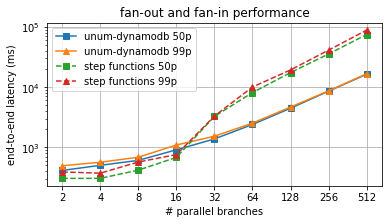

In [25]:
fig, ax = plt.subplots(figsize=(6,3))

ax.plot(fan_out_sizes, [aggregate[s]['unum 50p'][0] for s in aggregate], marker='s', label='unum-dynamodb 50p')
ax.plot(fan_out_sizes, [aggregate[s]['unum 99p'][0] for s in aggregate], marker='^', label='unum-dynamodb 99p')
ax.plot(fan_out_sizes, [aggregate[s]['sf 50p'][0] for s in aggregate], marker='s', ls='--', label='step functions 50p')
ax.plot(fan_out_sizes, [aggregate[s]['sf 99p'][0] for s in aggregate], marker='^', ls='--', label='step functions 99p')
ax.set_title('fan-out and fan-in performance')
ax.set(xlabel='# parallel branches',ylabel='end-to-end latency (ms)')
ax.set_yscale('log')
ax.legend()
ax.grid()

fig.savefig('MapMicroLatency.pdf', format='pdf')